<a href="https://colab.research.google.com/github/kevirui/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

def convertirADateTime(x):
    x['Fecha de Compra'] = pd.to_datetime(x['Fecha de Compra'], dayfirst=True)
def crearColumnaMes(x):
    x['Mes'] = x['Fecha de Compra'].dt.month
def crearColumnaMesNombre(x):
    x['Mes_nombre'] = x['Mes'].apply(lambda x: calendar.month_name[x])

# Convertir las fechas de la columna "fecha" a datetime para el entendimiento del lenguaje
convertirADateTime(tienda)
convertirADateTime(tienda2)
convertirADateTime(tienda3)
convertirADateTime(tienda4)

# Crear columna con el mes
crearColumnaMes(tienda)
crearColumnaMes(tienda2)
crearColumnaMes(tienda3)
crearColumnaMes(tienda4)

# Crear columna con el nombre del mes
crearColumnaMesNombre(tienda)
crearColumnaMesNombre(tienda2)
crearColumnaMesNombre(tienda3)
crearColumnaMesNombre(tienda4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Mes,Mes_nombre
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1,January
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,5,May
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,3,March
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,5,May
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,11,November


#1. Análisis de facturación



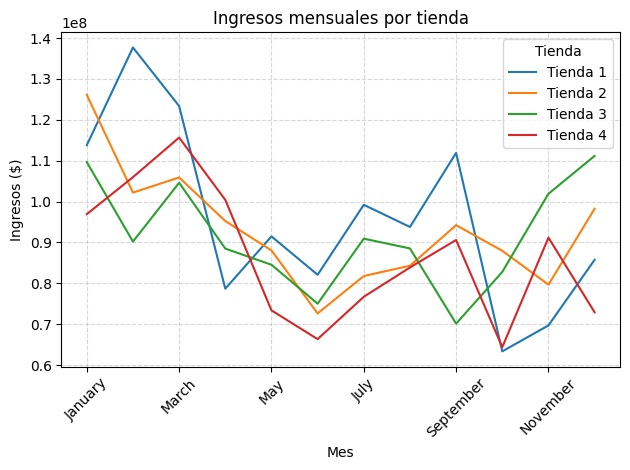

In [21]:
# Agrupo por mes sumando los ingresos totales de cada mes
ingresoMensual = lambda x: x.groupby(['Mes_nombre'])['Precio'].sum().reset_index()
ingresosMensuales = {
    'Tienda 1': ingresoMensual(tienda),
    'Tienda 2': ingresoMensual(tienda2),
    'Tienda 3': ingresoMensual(tienda3),
    'Tienda 4': ingresoMensual(tienda4)
}

# Uno todas las tiendas en una sola con la columna 'Tienda'
for nombre, df in ingresosMensuales.items():
  df['Tienda'] = nombre  # Agrego columna el nombre de la tienda

# Concatenar todas las tiendas en una
tiendasEIngresos = pd.concat(ingresosMensuales.values(), ignore_index=True)

pivote = tiendasEIngresos.pivot(index='Mes_nombre', columns='Tienda', values='Precio')
pivote = pivote.loc[calendar.month_name[1:]]  # ordena por meses de enero a diciembre

pivote.plot(kind='line')
plt.title("Ingresos mensuales por tienda")
plt.xlabel("Mes")
plt.ylabel("Ingresos ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tienda")
plt.show()

# 2. Ventas por categoría

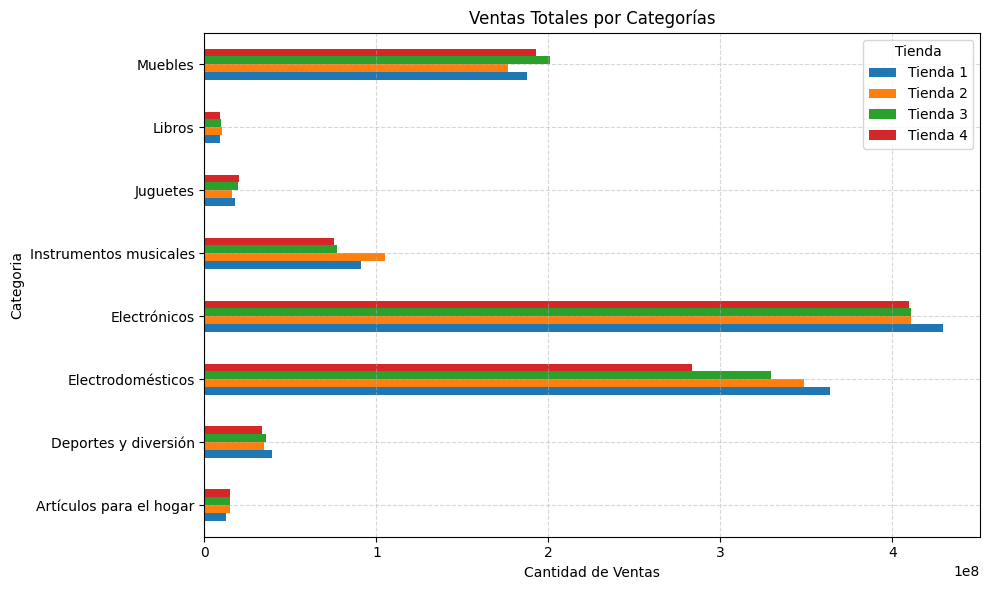

In [15]:
traerVentaTotalPorCategoria = lambda tiendaN: tiendaN.groupby('Categoría del Producto')['Precio'].sum()

# Tiendas con sus respectivas categorías destacadas
ventasTotalesCategoria = {
    'Tienda 1': traerVentaTotalPorCategoria(tienda),
    'Tienda 2': traerVentaTotalPorCategoria(tienda2),
    'Tienda 3': traerVentaTotalPorCategoria(tienda3),
    'Tienda 4': traerVentaTotalPorCategoria(tienda4),
}

# Convertir el diccionario con las categorias y tiendas, en un DataFrame
dfTiendasYCategorias = pd.DataFrame(ventasTotalesCategoria)
dfTiendasYCategorias.plot(kind='barh', figsize=(10, 6))

plt.title('Ventas Totales por Categorías')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Categoria')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Tienda")
plt.show()

# 3. Calificación promedio de la tienda


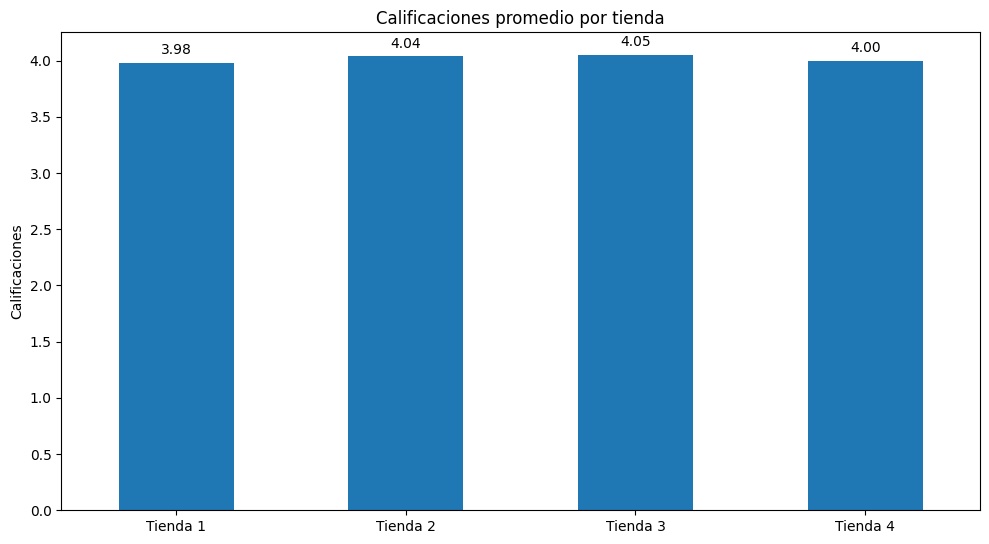

In [58]:
traerPromedioCalificacion = lambda x: round(x['Calificación'].mean(), 2)

promediosCalificaciones = {
    'Tienda 1': traerPromedioCalificacion(tienda),
    'Tienda 2': traerPromedioCalificacion(tienda2),
    'Tienda 3': traerPromedioCalificacion(tienda3),
    'Tienda 4': traerPromedioCalificacion(tienda4),
}

# Convertir el diccionario con las calificaciones y tiendas, en un DataFrame
dfPromediosCalificaciones = pd.DataFrame.from_dict(promediosCalificaciones, orient='index', columns=['Calificación'])
dfPromediosCalificaciones.plot(kind='bar', figsize=(10, 6))

# Pone los valores de las calificaciones por arriba de cada barra que la representa
for i, valor in enumerate(dfPromediosCalificaciones['Calificación']):
  plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Calificaciones promedio por tienda')
plt.ylabel('Calificaciones')
plt.tight_layout()
plt.xticks(rotation=0)
plt.legend().remove()
plt.show()


# 4. Productos más y menos vendidos

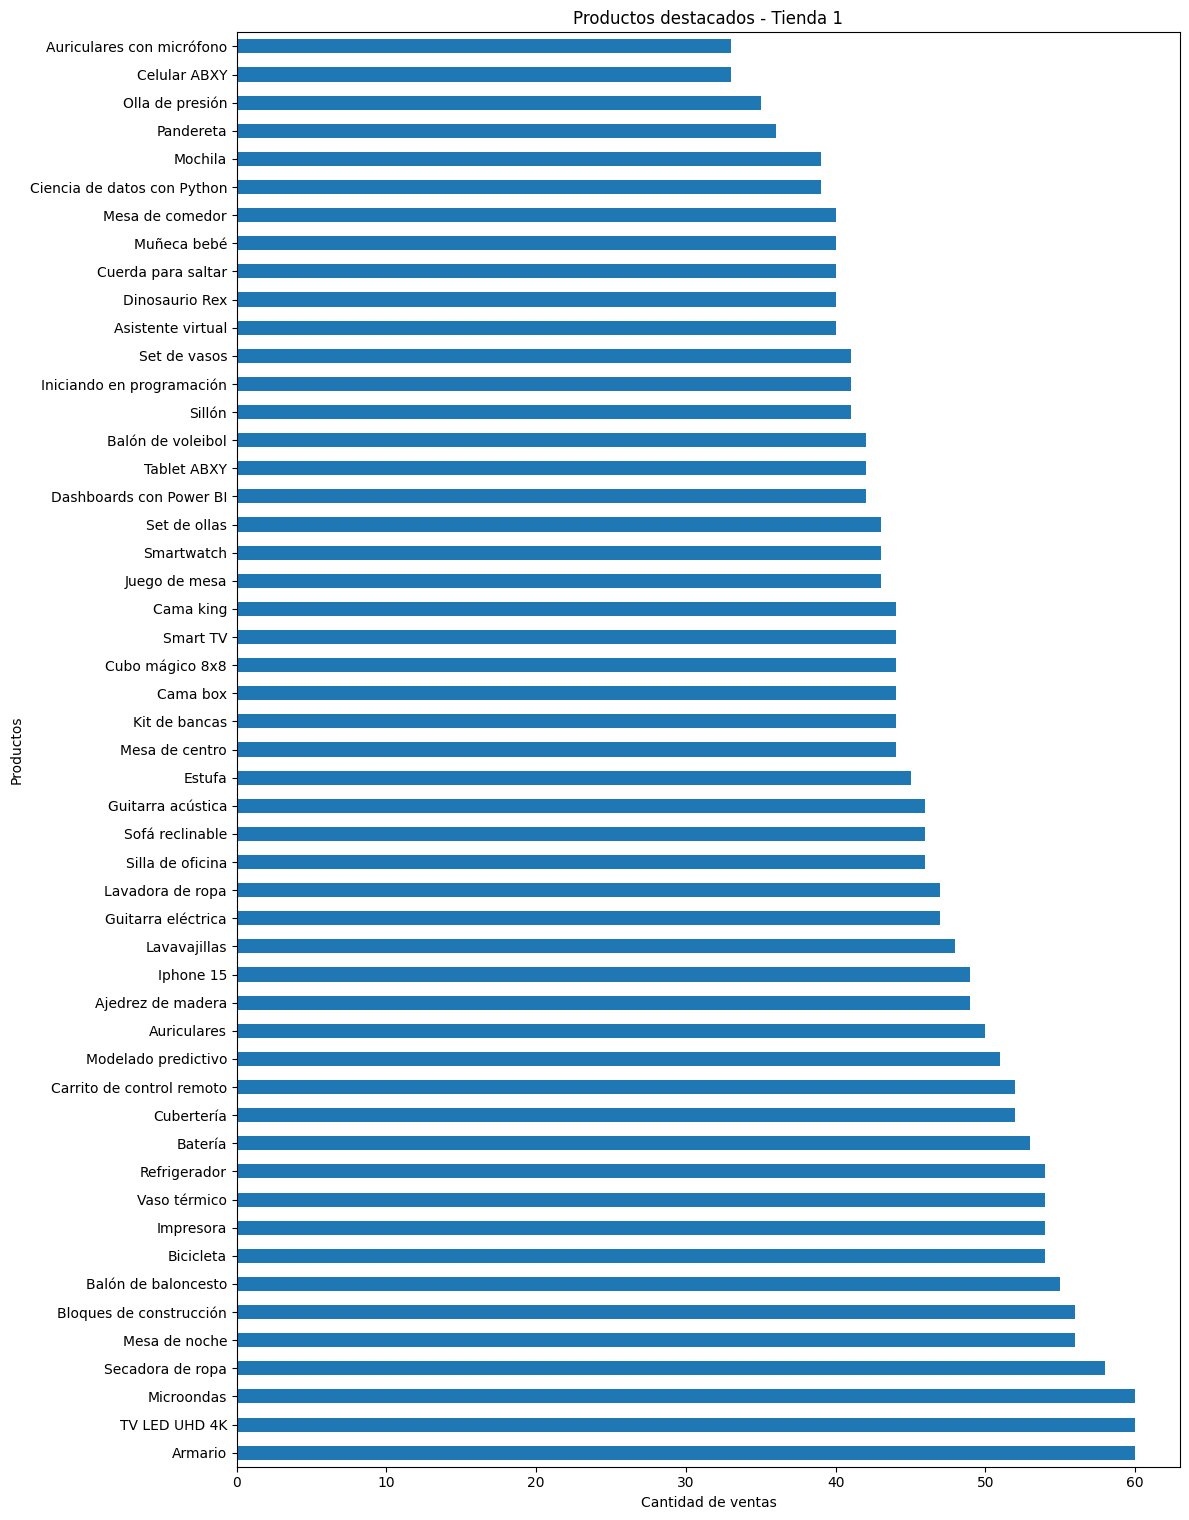

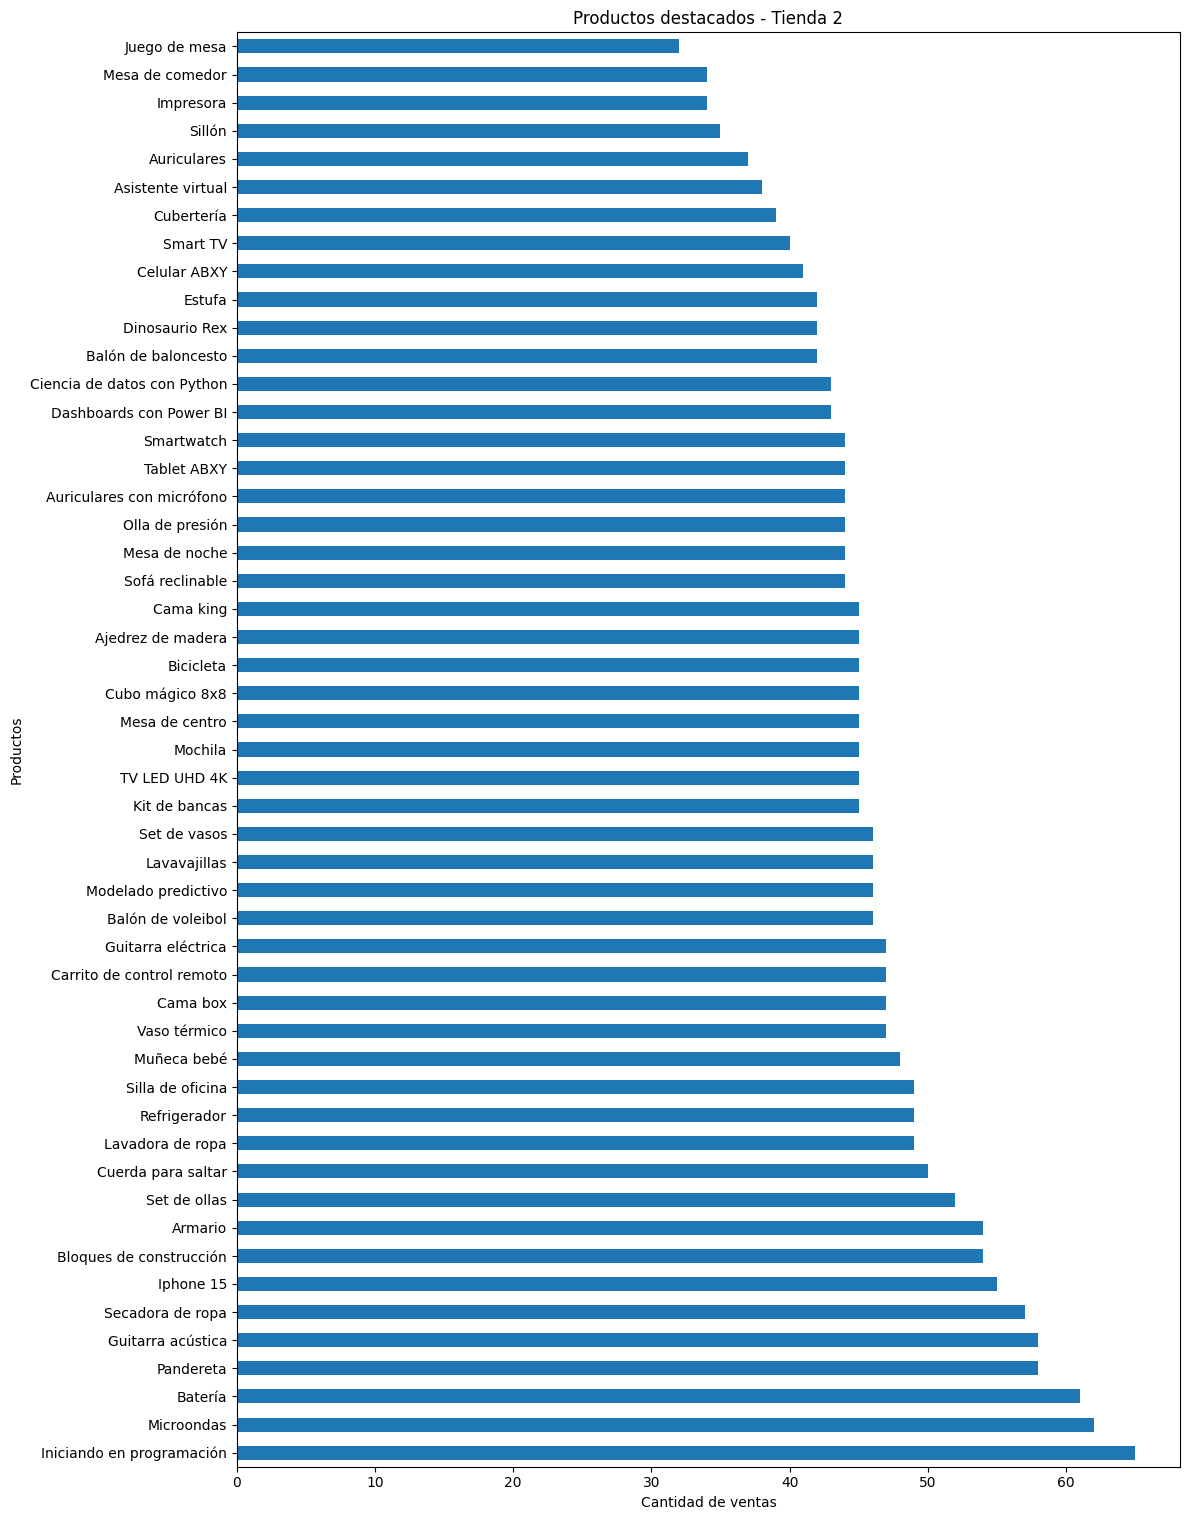

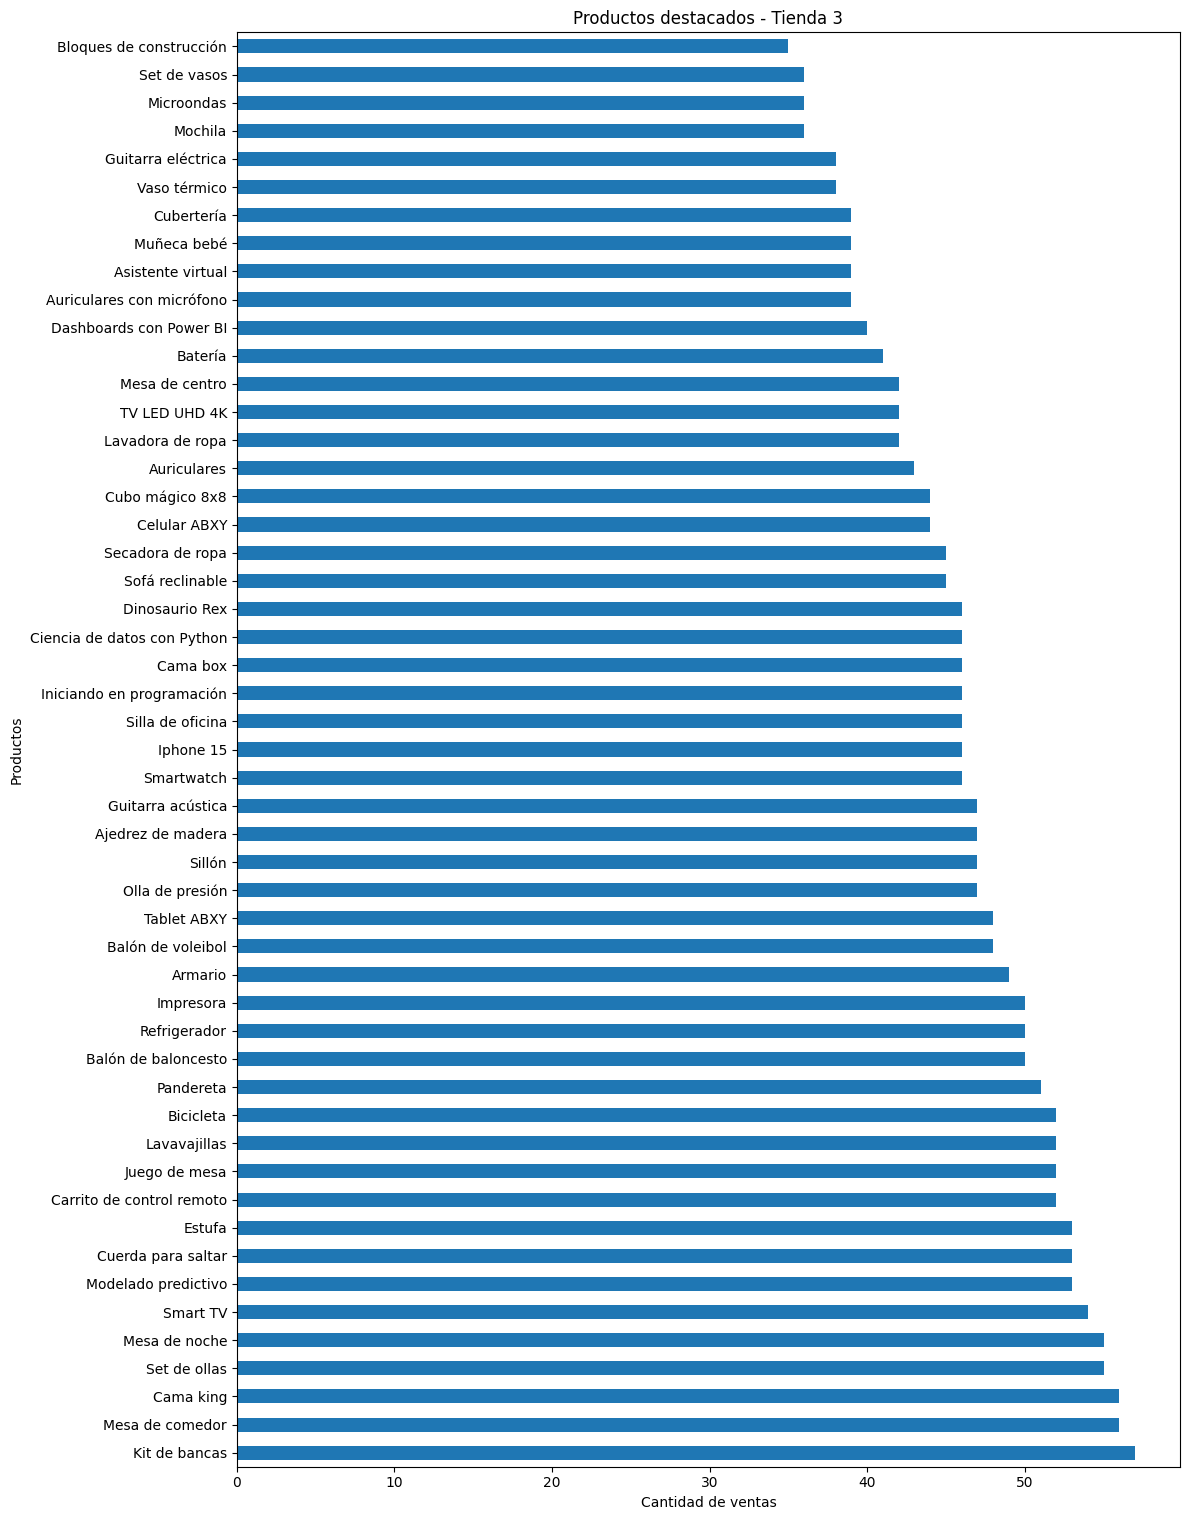

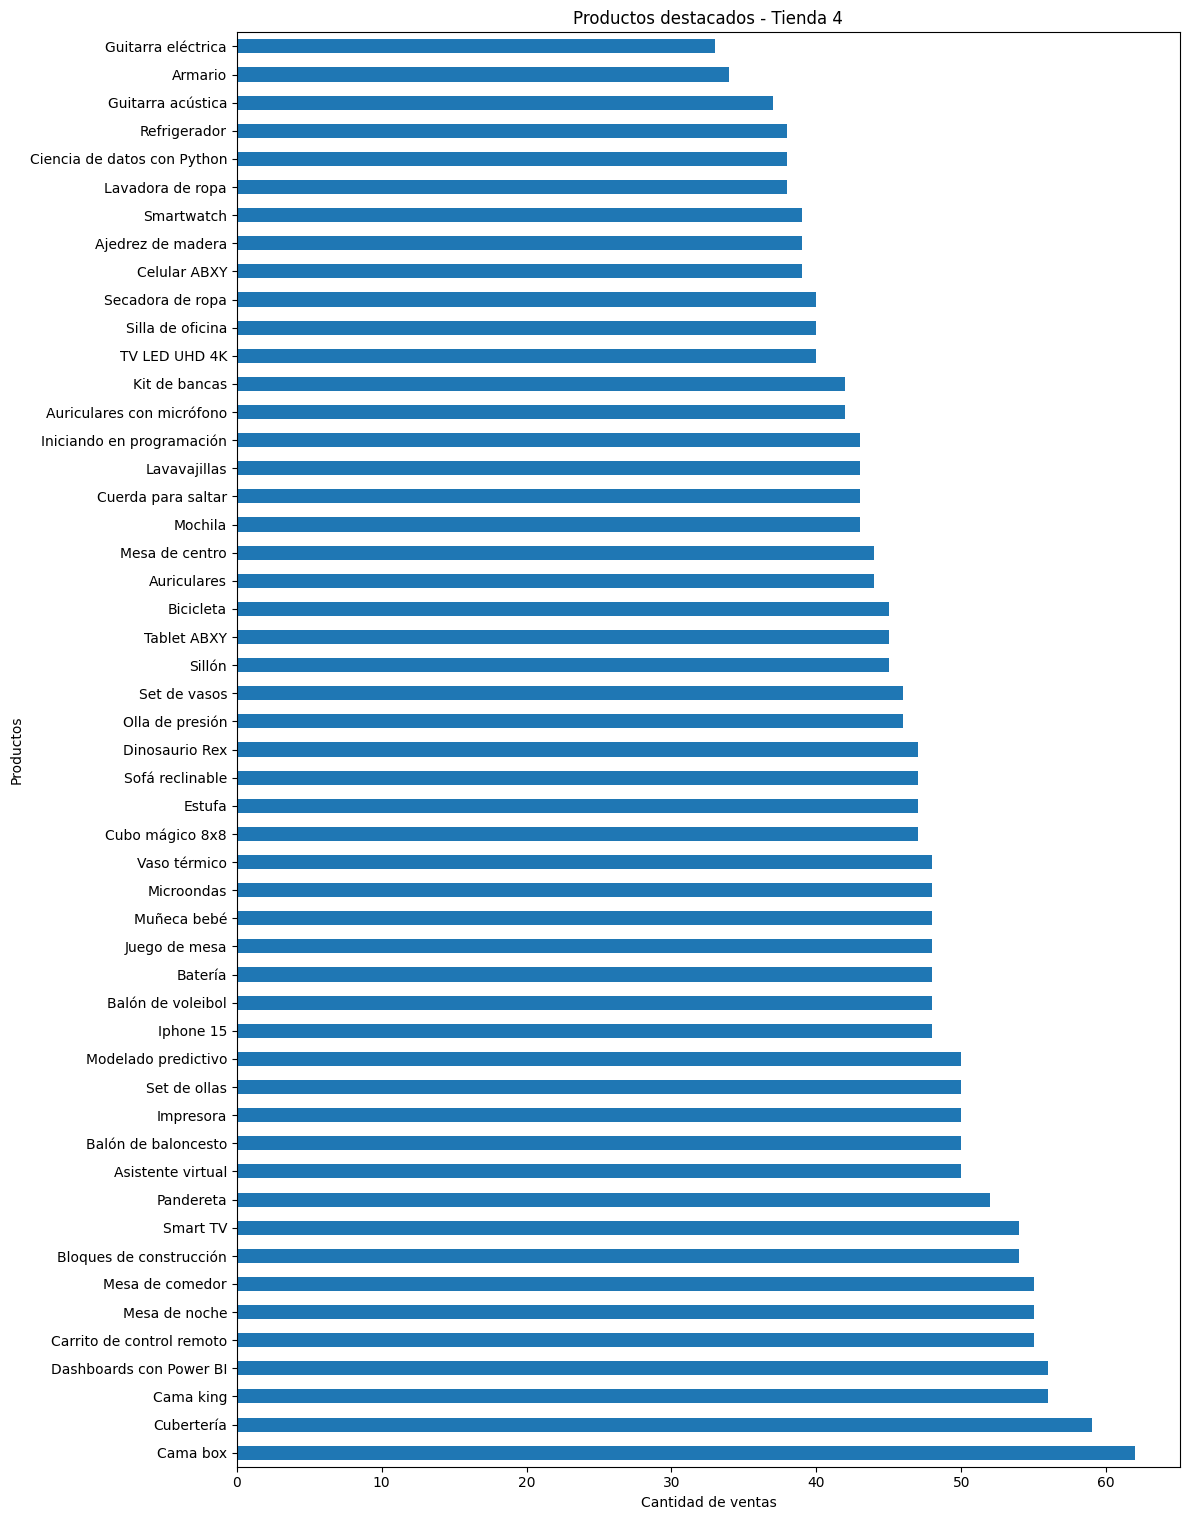

In [63]:
traerProductosDestacados = lambda x: x['Producto'].value_counts()

productosDestacados = {
    'Tienda 1': traerProductosDestacados(tienda),
    'Tienda 2': traerProductosDestacados(tienda2),
    'Tienda 3': traerProductosDestacados(tienda3),
    'Tienda 4': traerProductosDestacados(tienda4),
}

# Convertir el diccionario con los productos y tiendas, en un DataFrame
dfTiendasYProductos = pd.DataFrame(productosDestacados)
# dfTiendasYProductos.plot(kind='barh', figsize=(12, len(dfTiendasYProductos) * 0.3))

for tienda in dfTiendasYProductos:
  dfTiendasYProductos[tienda].sort_values(ascending=False).plot(kind='barh', figsize=(12, len(dfTiendasYProductos) * 0.3), title=f'Productos destacados - {tienda}')
  plt.xlabel('Cantidad de ventas')
  plt.ylabel('Productos')
  plt.tight_layout()
  plt.show()

# plt.title('Productos destacados por tienda')
# plt.xlabel('Cantidad de Ventas')
# plt.ylabel('Productos')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.legend(title="Tienda")
# plt.show()

# 5. Envío promedio por tienda

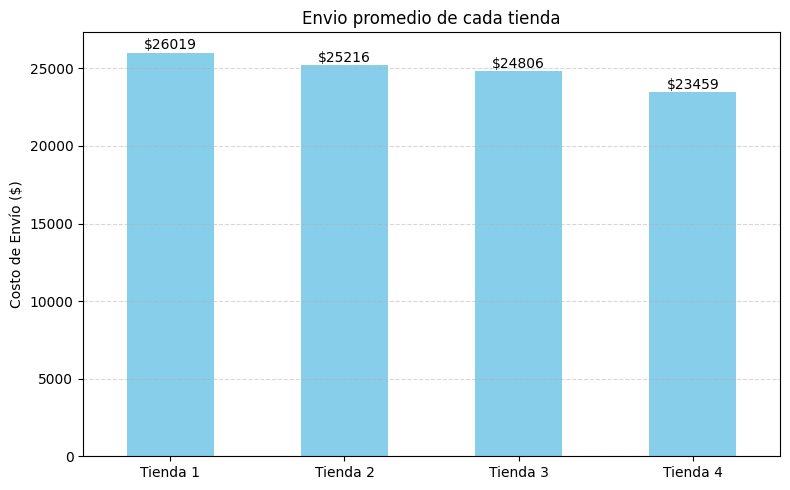

In [59]:
traerEnvioPromedio = lambda x: round(x['Costo de envío'].mean())

costosEnvios = {
    'Tienda 1': traerEnvioPromedio(tienda),
    'Tienda 2': traerEnvioPromedio(tienda2),
    'Tienda 3': traerEnvioPromedio(tienda3),
    'Tienda 4': traerEnvioPromedio(tienda4)
}

# asignamos el costoEnvios como un DataFrame a una variable
dfEnvios = pd.Series(costosEnvios)

dfEnvios.plot(kind='bar', figsize=(8, 5), color='skyblue')

# Agregamos el valor de cada envio por encima de cada barra que lo representa para mejor comprension de la grafica
for i, valor in enumerate(dfEnvios):
  plt.text(i, valor + 3, f"${valor:.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Envio promedio de cada tienda")
plt.ylabel("Costo de Envío ($)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()